In [6]:
import math
import random
import time
from jupyterthemes import jtplot
jtplot.style()

import gym
gym.logger.set_level(40)
import numpy as np


import nnabla as nn
import nnabla.logger as logger
import nnabla.functions as F
import nnabla.parametric_functions as PF
import nnabla.solver as S
from nnabla.contrib.context import extension_context
from nnabla.monitor import Monitor, MonitorSeries, MonitorTimeElapsed

2018-08-09 20:19:07,103 [nnabla][INFO]: Initializing CPU extension...


In [7]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
env = gym.make("CartPole-v0")


In [13]:
epsilon_start = 1.0
epsilon_final = 0.01
epsilon_decay = 500

epsilon_by_frame = lambda frame_idx: epsilon_final + (epsilon_start - epsilon_final) * math.exp(-1. * frame_idx / epsilon_decay)

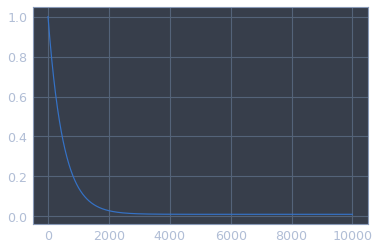

In [14]:
plt.plot([epsilon_by_frame(i) for i in range(10000)])

In [74]:
hidden_size = 128

In [102]:
class DQN:
    def __init__(self, num_states, num_actions):
        self.state_dim = num_states
        self.action_dim = num_actions 
    
    def forward(self, x):
        with nn.parameter_scope("DQN"):
            with nn.parameter_scope("affine1"):
                h = F.relu(PF.affine(x, hidden_size))
            with nn.parameter_scope("affine2"):
                h = F.relu(PF.affine(h, hidden_size))
            with nn.parameter_scope("affine3"):
                y = PF.affine(h, self.action_dim)
        return y
    
    def act(self, state, epsilon):
        if random.random() > epsilon:
            state = nn.Variable.from_numpy_array(state)
            q_value = self.forward(state)
            action  = q_value.max(1)[1].data[0]
        else:
            action = random.randrange(self.action_dim)
        return action
        
        

In [106]:
print("state_num ",env.observation_space.shape[0])
print("action_num ",env.action_space.n)

model = DQN(env.observation_space.shape[0], env.action_space.n)

state_num  4
action_num  2


[[-1.61238436 -1.06501107  1.11726521 -1.6813401   1.41740739]
 [-0.77844256 -1.64813031 -1.10063587  2.1590195   0.57423198]
 [-1.1277399   0.7254654   1.81602247 -0.30401144  0.08078209]
 [ 0.87250428 -1.17729786 -0.0251787   0.14500444  1.00670572]
 [ 0.99756096  0.25598537 -0.64710213  0.80288777  0.92306184]
 [-0.14986729  0.68140972 -0.98310185 -2.35202286  0.97241416]
 [-0.53753901 -1.52961832 -0.4724932   0.25484219  1.55171752]
 [-0.04530018  1.08325541 -0.13385044  0.53559444  0.90598798]
 [ 1.22821492 -0.82249445  0.53066313 -1.05007891 -0.14049199]
 [ 2.02928124  0.13450268  0.15676771  0.33442315  0.54670278]]
[[ 1.2093556e-13  1.8760711e+00  5.2405762e-14]
 [ 1.6250106e+00 -1.6821253e+00 -1.9178609e+00]
 [ 5.4467824e-16  1.5653200e+00  7.7465731e-31]
 [ 1.8932124e+00  9.1531882e-26  1.7996063e+00]
 [ 1.3307964e-24 -1.7967886e+00  4.3277005e-31]
 [-1.8993145e+00 -1.8956823e+21  1.5765032e+00]
 [ 1.3226967e-31 -1.2163416e+00 -3.3152811e+11]
 [ 1.9188713e+00  1.1688897e-05 -